In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Extracting all labels from the fale "coco.names" amd put them to list classes. We have 80 classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()] # With output_layers we can detect objects

colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread("test1.jpg") # Put the name of the Pic
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

In [50]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            # We can get Centrs of the objects
            #cv2.circle(img, (center_x, center_y), 10, (255, 0 ,0), 3)
            #fig = plt.figure(figsize=(40,25))
            #plt.imshow(img)
            #plt.show()

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [51]:
# Here we drow rectangles on image and write labels of objects
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

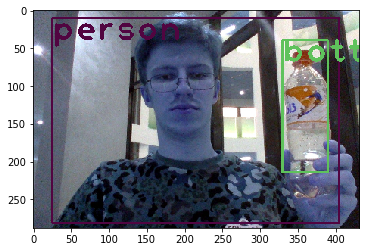

In [25]:
plt.imshow(img)
plt.show()

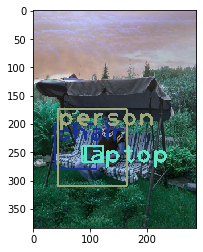

In [48]:
plt.imshow(img)
plt.show()

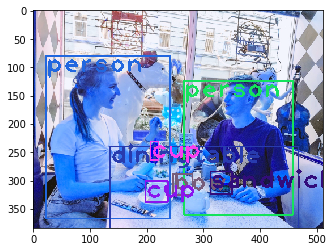

In [52]:
plt.imshow(img)
plt.show()